# Toxic Comments classification Using Deep Learning.
##### Even if most of it is just preprocessing of data

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
dir = "../input/cleaned-toxic-comments/train_preprocessed.csv"


## Get the Corpus of all the comments and related Toxicity fields

In [2]:
data = pd.read_csv(dir)
data.head()

,comment_text,id,identity_hate,insult,obscene,set,severe_toxic,threat,toxic,toxicity
0,explanation why the edits made under my userna...,0000997932d777bf,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
1,d aww he matches this background colour i m s...,000103f0d9cfb60f,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
2,hey man i m really not trying to edit war it...,000113f07ec002fd,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
3,more i can t make any real suggestions on im...,0001b41b1c6bb37e,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
4,you sir are my hero any chance you remember...,0001d958c54c6e35,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0


### We can see that the dataset contains the following fields,
1. comment_text: The comments in english
2. id: The comment Id (not useful)
3. identity_hate, insult, obscene, severe_toxic, threat, toxic: the types of toxicity in the comment
4. set: whether the comment is in train set or test set (since this is only training, this column isnt required)
5. toxicity: the measure of toxicity of the comment.( 0 for non toxic, 1 and above for toxic with increasing severity

## Since we are making a simple binary classifier which seperates toxic from non toxic, we can drop the types of toxicity and only keep the "toxicity" feature.

## Divide the data set into features and labels:
> Features = "comment"            
> Labels = "toxicity"

In [3]:
Features = data['comment_text']
Labels = np.array([0 if y == 0 else 1 for y in data['toxicity']])

# Tokenizing and preprocessing the data

### As we can see, the comments are in string format. Since our models require numerical data to work with, we need to convert these words into some numbers.

#### We can use the Tokenize function provided by keras api to convert the words in our comment_text to unique numbers for each word

In [4]:
NUM_WORDS = 40000 # Maximum number of unique words which need to be tokenized
MAXLEN = 50 # Maximum length of a sentence/ comment
PADDING = 'post' # The type of padding done for sentences shorter than the Max len

In [5]:
tokenizer = Tokenizer(num_words=NUM_WORDS)

# Fit the tokenizer on the comments 
tokenizer.fit_on_texts(Features)

# Get the word index of the top 20000 words from the dataset
word_idx = tokenizer.word_index

# Convert the string sentence to a sequence of their numerical values
Feature_sequences = tokenizer.texts_to_sequences(Features)

# Pad the sequences to make them of uniform length
padded_sequences = pad_sequences(Feature_sequences, maxlen = MAXLEN, padding = PADDING)

In [6]:
print("The Transformation of sentence::")
print("\n\nThe normal Sentencen:\n")
print(Features[2])
print("\n\nThe tokenized sequence:\n")
print(Feature_sequences[2])
print("\n\nThe padded sequence:\n")
print(padded_sequences[2])

# Convert to array for passing through the model
X = np.array(padded_sequences)

The Transformation of sentence::


The normal Sentencen:

hey man  i m really not trying to edit war  it s just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page  he seems to care more about the formatting than the actual info 


The tokenized sequence:

[406, 415, 3, 69, 138, 14, 252, 2, 77, 317, 10, 17, 54, 9, 13, 591, 8, 2183, 493, 503, 107, 5, 598, 2, 39, 332, 131, 365, 4, 31, 38, 30, 51, 214, 2, 429, 61, 40, 1, 2276, 97, 1, 717, 466]


The padded sequence:

[ 406  415    3   69  138   14  252    2   77  317   10   17   54    9
   13  591    8 2183  493  503  107    5  598    2   39  332  131  365
    4   31   38   30   51  214    2  429   61   40    1 2276   97    1
  717  466    0    0    0    0    0    0]


# Loading the word Embeddings
### When training a deep learning model on text, an Embedding layer is created which assigns some set of vectors to a word so that similar meaning words get clustered together. Since it is a long and compuatation heavy task, we generally import these vectors and use them.

### These vectors are ususally of a higher dimension example 50 or 100 so that the meaning of the words can be classified properly.


<img src="https://nlp.stanford.edu/projects/glove/images/man_woman.jpg" style="width:800px;height:500px;">

#### GloVe Visualization provided by stanford

### There are multiple sources from where a person can get these word embeddings. We will use the one named as "Global Vector for Word Representation" or GloVe provided [Here](url:"https://www.kaggle.com/watts2/glove6b50dtxt") . You can read more about it on [this page](https://nlp.stanford.edu/projects/glove/)
### In this notebook we will be using 50 dimensional vector version for the word embeddings.    
#### The embeddings are stored as : "word",    vector[0],     vector[1],      vector[2], ..........,     vector[49]

In [7]:
with open("../input/glove6b50dtxt/glove.6B.50d.txt", encoding='utf-8') as f:
    for x in f:
        print(x)
        break

the 0.418 0.24968 -0.41242 0.1217 0.34527 -0.044457 -0.49688 -0.17862 -0.00066023 -0.6566 0.27843 -0.14767 -0.55677 0.14658 -0.0095095 0.011658 0.10204 -0.12792 -0.8443 -0.12181 -0.016801 -0.33279 -0.1552 -0.23131 -0.19181 -1.8823 -0.76746 0.099051 -0.42125 -0.19526 4.0071 -0.18594 -0.52287 -0.31681 0.00059213 0.0074449 0.17778 -0.15897 0.012041 -0.054223 -0.29871 -0.15749 -0.34758 -0.045637 -0.44251 0.18785 0.0027849 -0.18411 -0.11514 -0.78581



As we can see, the word is followed by a long list of vectors corresponding to the word 'the' we need to split the word and the vectors and store in a dictionary for easy use

In [8]:
EMBEDDING_DIM = 50 # number of dimensions of the word embeddings

In [9]:
# initialize the word to index dictionary
word_2_vec = {}
with open("../input/glove6b50dtxt/glove.6B.50d.txt", encoding='utf-8') as f:
    for line in f:
        
        # spilt the elements by space
        elements = line.split()
        word = elements[0]
        # convert to np array
        vecs = np.asarray(elements[1:], dtype='float32')
        word_2_vec[word] = vecs
        
print("Done....\n")

Done....



In [10]:
print(f"Number of words {len(word_2_vec)}")
print(f"Shape of the vector {len(word_idx)}")
print(f"Number of max words to be saved {NUM_WORDS}")

Number of words 400000
Shape of the vector 166929
Number of max words to be saved 40000


### Cool. So we have 400000 unique words with their vectors. Time to convert each word in the comment_text to a sequence of these vectors

# Combine the Word Index and the Vectors
### First we find the minimum from the number of our vocabulary words and number of words that are indexed during the tokenizer fit since we want the words in the embedding matrix to be in our vocabulary AND have a token. It should also have a vector associated with it.

In [11]:
# get the max number of words that exist in word index and vocabulary both
num = min(NUM_WORDS, len(word_idx)+ 1)

# Matrix containing the word index and the vector of the word
embedding_matrix = np.zeros((num, EMBEDDING_DIM))

for word, idx in word_idx.items():
    if idx < NUM_WORDS:
        word_vec = word_2_vec.get(word)
        if word_vec is not None:
            embedding_matrix[idx] = word_vec
            
print(embedding_matrix.shape)

(40000, 50)


# Making and training on the model


## Coming to the best part of the project, Training the model



### Before we start on the model, lets first make a class which could help us train multiple models one after the other and compare them

In [12]:
def train(models, epochs, graph=True, verbose=2):
    n = 1
    plt.figure(figsize=(10, 7))
    
    histories = []
    for model in models:
        print(f"model number : {n} is training")
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

        history = model.fit(
            X, 
            Labels,
            batch_size=128,
            epochs=epochs,
            validation_split=0.2, # 20 percent data reserved for validation to avoid or monitor overfitting/ underfitting
            verbose=verbose,
        )
        histories.append(history)
        
        if graph:
            plt.plot(history.history['val_acc'], label=f"Model {n}")
        n+=1
            
    plt.xlabel('Epochs')
    plt.ylabel('Validation Accuracy')
    plt.legend()

### Lets start with a very simple model which starts with an embedding layers, goes throught an LSTM and an GlobalAveragePool and then to a Final output layer with a sigmoid activation.

#### For information about the LSTM networks or other RNN networks you can refer to [this video](https://www.youtube.com/watch?v=WCUNPb-5EYI) or try to get [this course](https://www.coursera.org/specializations/natural-language-processing) by Deeplearning.ai on Coursera(highly recommended)

In [13]:
model = tf.keras.models.Sequential([
    
    # Embedding layers that takes in the embedding matrix. Be sure to set trainable to false or else it will mess up your 
    # nicely pre trained vectors
    tf.keras.layers.Embedding(num, EMBEDDING_DIM, weights=[embedding_matrix], input_length=MAXLEN,trainable=False),
    tf.keras.layers.LSTM(5, return_sequences=True),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 50)            2000000   
_________________________________________________________________
lstm (LSTM)                  (None, 50, 5)             1120      
_________________________________________________________________
global_average_pooling1d (Gl (None, 5)                 0         
_________________________________________________________________
dense (Dense)                (None, 1)                 6         
Total params: 2,001,126
Trainable params: 1,126
Non-trainable params: 2,000,000
_________________________________________________________________


## Lets add some more LSTM units and more Dense Layers

In [14]:
model2= tf.keras.models.Sequential([
    tf.keras.layers.Embedding(num, EMBEDDING_DIM, weights=[embedding_matrix], input_length=MAXLEN,trainable=False),
    tf.keras.layers.LSTM(50, return_sequences=True),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 50)            2000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 50)            20200     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               6528      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 645       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 2,027,379
Trainable params: 27,379
Non-trainable params: 2,000,000
_______________________________________

## Lets add some Convolution layers to see how it does

In [15]:
model3= tf.keras.models.Sequential([
    tf.keras.layers.Embedding(num, EMBEDDING_DIM, weights=[embedding_matrix], input_length=MAXLEN,trainable=False),
    
    tf.keras.layers.LSTM(50, return_sequences=True),
    tf.keras.layers.Conv1D(10,15, activation='relu'),

    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 50, 50)            2000000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 50, 50)            20200     
_________________________________________________________________
conv1d (Conv1D)              (None, 36, 10)            7510      
_________________________________________________________________
global_average_pooling1d_2 ( (None, 10)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1408      
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 645       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                

## Finally lets add some Bidirectional LSTMs to the first model to see how it compares 

In [16]:
model4= tf.keras.models.Sequential([
    
    # Embedding layers that takes in the embedding matrix. Be sure to set trainable to false or else it will mess up your 
    # nicely pre trained vectors
    tf.keras.layers.Embedding(num, EMBEDDING_DIM, weights=[embedding_matrix], input_length=MAXLEN,trainable=False),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(5, return_sequences=True)),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 50, 50)            2000000   
_________________________________________________________________
bidirectional (Bidirectional (None, 50, 10)            2240      
_________________________________________________________________
global_average_pooling1d_3 ( (None, 10)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 2,002,251
Trainable params: 2,251
Non-trainable params: 2,000,000
_________________________________________________________________


## Time to finally use our train function

model number : 1 is training
Epoch 1/10
998/998 - 8s - loss: 0.2969 - acc: 0.8812 - val_loss: 0.1907 - val_acc: 0.9304
Epoch 2/10
998/998 - 8s - loss: 0.1798 - acc: 0.9339 - val_loss: 0.1670 - val_acc: 0.9425
Epoch 3/10
998/998 - 9s - loss: 0.1631 - acc: 0.9417 - val_loss: 0.1557 - val_acc: 0.9453
Epoch 4/10
998/998 - 8s - loss: 0.1540 - acc: 0.9454 - val_loss: 0.1503 - val_acc: 0.9477
Epoch 5/10
998/998 - 8s - loss: 0.1481 - acc: 0.9479 - val_loss: 0.1475 - val_acc: 0.9483
Epoch 6/10
998/998 - 8s - loss: 0.1444 - acc: 0.9491 - val_loss: 0.1460 - val_acc: 0.9484
Epoch 7/10
998/998 - 8s - loss: 0.1417 - acc: 0.9506 - val_loss: 0.1427 - val_acc: 0.9501
Epoch 8/10
998/998 - 8s - loss: 0.1395 - acc: 0.9511 - val_loss: 0.1425 - val_acc: 0.9497
Epoch 9/10
998/998 - 8s - loss: 0.1385 - acc: 0.9513 - val_loss: 0.1433 - val_acc: 0.9498
Epoch 10/10
998/998 - 8s - loss: 0.1369 - acc: 0.9519 - val_loss: 0.1404 - val_acc: 0.9502
model number : 2 is training
Epoch 1/10
998/998 - 9s - loss: 0.1684 - 

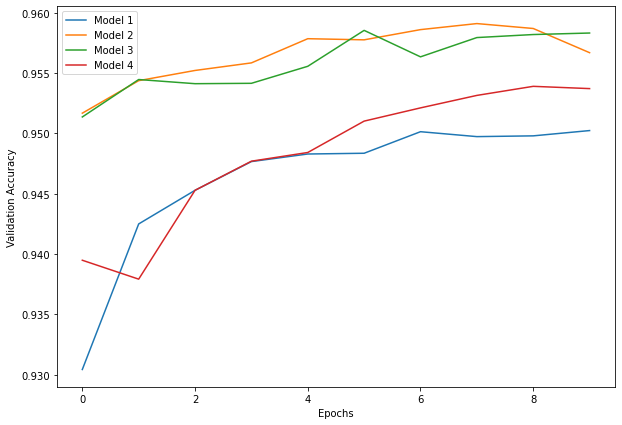

In [17]:
models = [model, model2, model3, model4]
train(models, epochs=10)

### You can test out your own combinations for the models. I hope you learnt something new and useful today. If you have any questions, leave them in the comments and i will try my best to help you out